In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_excel('InputData.xlsx',sheet_name='Pucks')
print(df.columns)

Index(['飞机转场记录号', '到达\n日期', '到达\n时刻', '到达\n航班', '到达类型', '飞机型号', '出发\n日期',
       '出发\n时刻', '出发\n航班', '出发类型', '上线\n机场', '下线\n机场'],
      dtype='object')


In [306]:
df.head(2)

,飞机转场记录号,到达\n日期,到达\n时刻,到达\n航班,到达类型,飞机型号,出发\n日期,出发\n时刻,出发\n航班,出发类型,上线\n机场,下线\n机场
0,PK001,2018-01-19,10:00:00,NV6294,D,321,2018-01-19,12:40:00,NV3118,I,QFL,NGN
1,PK002,2018-01-19,10:00:00,NV898,D,33E,2018-01-19,12:30:00,NV898,I,XOA,GDP


In [307]:
df['飞机型号'].value_counts()

320    165
73H    103
325     99
738     81
319     59
73E     57
773     42
33E     30
73A     27
323     27
33L     21
33H     18
321     17
332      5
73L      2
Name: 飞机型号, dtype: int64

In [308]:
df1=df[(df['到达\n日期']=='2018-01-20') | (df['出发\n日期']=='2018-01-20')]
df1[(df1['到达\n航班']=='GN0641')]

,飞机转场记录号,到达\n日期,到达\n时刻,到达\n航班,到达类型,飞机型号,出发\n日期,出发\n时刻,出发\n航班,出发类型,上线\n机场,下线\n机场
366,PK367,2018-01-20,19:10:00,GN0641,D,738,2018-01-20,21:20:00,GN0428,D,XOA,DBO


In [309]:
'''
宽体机（Wide-body）：332, 333, 33E, 33H, 33L, 773
窄体机（Narrow-body）：319, 320, 321, 323, 325, 738, 73A, 73E, 73H, 73L。
'''
list1=[332, 333, '33E','33H', '33L', 773]
list2=[319, 320, 321, 323, 325, 738, '73A', '73E', '73H', '73L']
df1

,飞机转场记录号,到达\n日期,到达\n时刻,到达\n航班,到达类型,飞机型号,出发\n日期,出发\n时刻,出发\n航班,出发类型,上线\n机场,下线\n机场
61,PK062,2018-01-19,14:55:00,GN0523,D,73E,2018-01-20,16:20:00,GN0256,D,NJH,ZDV
71,PK072,2018-01-19,15:35:00,GN0497,D,73L,2018-01-20,17:05:00,GN0644,D,OOH,YNO
88,PK089,2018-01-19,16:30:00,NV663,I,33H,2018-01-20,13:30:00,NV692,I,MIS,ZWS
93,PK094,2018-01-19,16:55:00,NV693,I,33H,2018-01-20,13:00:00,NV662,I,ZWS,MIS
101,PK102,2018-01-19,17:35:00,GN0209,D,73A,2018-01-20,13:50:00,GN0658,D,BPH,UHP
...,...,...,...,...,...,...,...,...,...,...,...,...
496,PK497,2018-01-20,9:50,GN0413,D,738,2018-01-20,11:10:00,GN0530,D,DBO,IOZ
497,PK498,2018-01-20,9:50,NV6479,D,319,2018-01-20,11:05:00,NV6752,D,DTY,EMD
498,PK499,2018-01-20,9:50,NV837,I,319,2018-01-20,13:00:00,NV3194,D,ILH,UTO
499,PK500,2018-01-20,9:55,GN0471,D,73A,2018-01-20,11:30:00,GN0208,D,AIB,BPH


In [310]:
list3=[]
for i in df1.index:
    if(df1.loc[i]['飞机型号'] in list1):
        list3.append('W')
    else:
        list3.append('N')
df1['飞机型号']=list3

C:\Users\Bingbing\AppData\Local\Temp/ipykernel_22912/982615846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['飞机型号']=list3


In [311]:
df2=pd.read_excel('InputData.xlsx',sheet_name='Gates')
df2.columns

Index(['登机口', '终端厅', '区域', '到达类型', '出发类型', '机体类别'], dtype='object')

In [312]:
df2['到达类型'].value_counts()

D       39
I       22
D, I     8
Name: 到达类型, dtype: int64

In [313]:
df2_1=pd.read_excel('W_I_D.xlsx')
df2_2=pd.read_excel('W_I_I.xlsx')
df2_3=pd.read_excel('W_D_I.xlsx')
df2_4=pd.read_excel('W_D_D.xlsx')
df2_5=pd.read_excel('N_I_I.xlsx')
df2_6=pd.read_excel('N_I_D.xlsx')
df2_7=pd.read_excel('N_D_I.xlsx')
df2_8=pd.read_excel('N_D_D.xlsx')

In [314]:
print(df2_1['index'].values)
print(df2_2['index'].values)
print(df2_3['index'].values)
print(df2_4['index'].values)
print(df2_5['index'].values)
print(df2_6['index'].values)
print(df2_7['index'].values)
print(df2_8['index'].values)

[ 4  5 22 23]
[ 1  2  3  4  5 22 23 24 25 26 27 58 59 60 61 62 63 64 65 66 67 68]
[ 5 22 23 24]
[ 5 22 23 24 56 57]
[ 0  6 21 38 39 40]
[ 6  7  8 21]
[ 6 19 20 21]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 28 29 30 31 32 33 34 35
 36 37 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]


In [315]:
list4=[]
for i in df1.index:
   if(df1.loc[i]['飞机型号']=='W' and df1.loc[i]['到达类型']=='I' and df1.loc[i]['出发类型']=='D'):
       list4.append(df2_1['index'].values)
   elif(df1.loc[i]['飞机型号']=='W' and df1.loc[i]['到达类型']=='I' and df1.loc[i]['出发类型']=='I'):
       list4.append(df2_2['index'].values)
   elif(df1.loc[i]['飞机型号']=='W' and df1.loc[i]['到达类型']=='D' and df1.loc[i]['出发类型']=='I'):
       list4.append(df2_3['index'].values)
   elif(df1.loc[i]['飞机型号']=='W' and df1.loc[i]['到达类型']=='D' and df1.loc[i]['出发类型']=='D'):
       list4.append(df2_4['index'].values)
   elif(df1.loc[i]['飞机型号']=='N' and df1.loc[i]['到达类型']=='I' and df1.loc[i]['出发类型']=='I'):
       list4.append(df2_5['index'].values)
   elif(df1.loc[i]['飞机型号']=='N' and df1.loc[i]['到达类型']=='I' and df1.loc[i]['出发类型']=='D'):
       list4.append(df2_6['index'].values)
   elif(df1.loc[i]['飞机型号']=='N' and df1.loc[i]['到达类型']=='D' and df1.loc[i]['出发类型']=='I'):
       list4.append(df2_7['index'].values)
   elif(df1.loc[i]['飞机型号']=='N' and df1.loc[i]['到达类型']=='D' and df1.loc[i]['出发类型']=='D'):
       list4.append(df2_8['index'].values)
   else:
       print('EOFError')
df1['可分配登机口']=list4

C:\Users\Bingbing\AppData\Local\Temp/ipykernel_22912/2369796270.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['可分配登机口']=list4


In [316]:
df1.to_csv('data.csv')

In [317]:
# dt = d.name.strftime("%Y-%m-%d %H:%M:%S")  # 使用Timestamp对象的strftime方法转换成格式化字符串
# dt = datetime.strptime(dt, "%Y-%m-%d %H:%M:%S") # 使用datetime.strptime将格式化字符串转换成
#
import datetime
time1_list=[]
time2_list=[]
for i in df1.index:
    if(df1.loc[i]['到达\n日期'].strftime("%Y-%m-%d %H:%M:%S")=='2018-01-20 00:00:00'):
        if (isinstance(df1.loc[i]['到达\n时刻'],str)):
           str1_1='0'+str(df1.loc[i]['到达\n时刻'])[1:]
           time3_1=datetime.datetime.strptime(str1_1, "%H:%M")
           time1=time3_1.hour*60+time3_1.minute
        else:
            time1=df1.loc[i]['到达\n时刻'].hour*60+df1.loc[i]['到达\n时刻'].minute



        if(df1.loc[i]['出发\n日期'].strftime("%Y-%m-%d %H:%M:%S")=='2018-01-20 00:00:00'):
            if (isinstance(df1.loc[i]['出发\n时刻'],str)):
               str1_2='0'+str(df1.loc[i]['出发\n时刻'])[1:]
               time3_2=datetime.datetime.strptime(str1_2, "%H:%M")
               time2=time3_2.hour*60+time3_2.minute
            else:
                time2=df1.loc[i]['出发\n时刻'].hour*60+df1.loc[i]['出发\n时刻'].minute
            #print(type(df1.loc[i]['出发\n时刻']),df1.loc[i]['出发\n时刻'])
        if(df1.loc[i]['出发\n日期'].strftime("%Y-%m-%d %H:%M:%S")=='2018-01-21 00:00:00'):
            if (isinstance(df1.loc[i]['出发\n时刻'],str)):
               str1_3='0'+str(df1.loc[i]['出发\n时刻'])[1:]
               time3_3=datetime.datetime.strptime(str1_3, "%H:%M")
               time2=time3_3.hour*60+time3_3.minute+24*60
            else:
                time2=df1.loc[i]['出发\n时刻'].hour*60+df1.loc[i]['出发\n时刻'].minute+24*60




    elif(df1.loc[i]['到达\n日期'].strftime("%Y-%m-%d %H:%M:%S")=='2018-01-19 00:00:00'):

        if (isinstance(df1.loc[i]['到达\n时刻'],str)):
           str1='0'+str(df1.loc[i]['到达\n时刻'])[1:]
           time3=datetime.datetime.strptime(str1, "%H:%M")
           time1=-(60-time3.minute+(23-time3.hour)*60)
        else:
            time1=-(60-df1.loc[i]['到达\n时刻'].minute+(23-df1.loc[i]['到达\n时刻'].hour)*60)


        if(df1.loc[i]['出发\n日期'].strftime("%Y-%m-%d %H:%M:%S")=='2018-01-20 00:00:00'):
            if (isinstance(df1.loc[i]['出发\n时刻'],str)):
               str1='0'+str(df1.loc[i]['出发\n时刻'])[1:]
               time3=datetime.datetime.strptime(str1, "%H:%M")
               time2=time3.hour*60+time3.minute
            else:
                time2=df1.loc[i]['出发\n时刻'].hour*60+df1.loc[i]['出发\n时刻'].minute
            #print(type(df1.loc[i]['出发\n时刻']),df1.loc[i]['出发\n时刻'])
    else:
        print('Error')




    time1_list.append(time1)
    time2_list.append(time2)
df1['到达\n时刻']=time1_list
df1['出发\n时刻']=time2_list
df1['time_0']=df1['出发\n时刻']-df1['到达\n时刻']
df1.to_csv('data.csv')

C:\Users\Bingbing\AppData\Local\Temp/ipykernel_22912/3874188215.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['到达\n时刻']=time1_list
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_22912/3874188215.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['出发\n时刻']=time2_list
C:\Users\Bingbing\AppData\Local\Temp/ipykernel_22912/3874188215.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [318]:
df1_1=df1.sort_values(by='time_0',ascending=True)

df1_1.index=range(len(df1_1))
# print(min(df1_1['到达\n时刻']))
# print(max(df1_1['出发\n时刻']))
df1_1.head(5)

,飞机转场记录号,到达\n日期,到达\n时刻,到达\n航班,到达类型,飞机型号,出发\n日期,出发\n时刻,出发\n航班,出发类型,上线\n机场,下线\n机场,可分配登机口,time_0
0,PK422,2018-01-20,1345,GN0645,D,N,2018-01-20,1395,*****,D,YNO,***,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",50
1,PK339,2018-01-20,1020,*****,D,N,2018-01-20,1070,GN0332,D,***,MIX,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",50
2,PK273,2018-01-20,680,NV6535,D,N,2018-01-20,730,*****,D,DLH,***,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",50
3,PK388,2018-01-20,1215,NV6551,D,N,2018-01-20,1265,*****,D,UTO,***,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",50
4,PK396,2018-01-20,1240,*****,D,N,2018-01-20,1290,NV6478,D,***,DTY,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",50


In [319]:
def flag_or_not(gate_time,time_a,time_d):
    flag=True
    index1=(time_a-(-1140))/5
    index2=(time_d-(-1140))/5

    for i in range(int(index1),int(index2)):
        #如果有飞机停放则是不能安排新的飞机
        if gate_time[i]==0:
            flag=False
            break
    return flag
def update_time_plan(gate_time,time_a,time_d):
    index1=(time_a-(-1140))/5
    #45min 的两架飞机衔接时间
    index2=(time_d+45-(-1140))/5
    for i in range(int(index1),int(index2)):

        gate_time[i]=0
    return gate_time

In [320]:
df3=pd.read_excel('InputData.xlsx',sheet_name='Gates')
def sort_gates(puck_gate_list,gate_list):
    dict2={}
    for choice in puck_gate_list:
        dict2.update({choice:gate_list[choice]['time_plan'].count(0)/734})
    max_gates=[i[0] for i in sorted(dict2.items(), key=lambda x: x[1],reverse=True)]
    return max_gates
def generation_plan(df3=df3):
    import random
    '''
    获取登机口的数据
    Data Structure：[{区域1，终端厅1，分配的航班1，可继续分配时间1}，{区域2，终端厅2，分配的航班2，可继续分配时间2}……]
    '''

    gate_list=[]
    for i in df3.index:
        dict={'Area':df3['区域'][i],'Zhongduanting':df3['终端厅'][i],\
              'pucks_list':[],'ID':df3['登机口'][i],\
              'time_plan':[1]*734}
        gate_list.append(dict)
    '''
    获取航班的数据
    Data Structure:[{转场记录号1，到达时刻1，出发时刻1，可分配登机口1，是否被分配登机口1，登机口1，区域1，终端厅1，到达航班1，出发航班2}]
    '''
    puck_list=[]
    list1=[i for i in range(len(df1_1))]
    random.shuffle(list1)
    for i in list1:
        dict={'ID':df1_1['飞机转场记录号'][i],'Time_a':df1_1['到达\n时刻'][i],'Time_l':df1_1['出发\n时刻'][i],\
              'gates_list':df1_1['可分配登机口'][i],'flag':False,'gate':None,'Area':None,'Zhongduanting':None,\
              'puck_a':df1_1['到达\n航班'][i],'puck_l':df1_1['出发\n航班'][i],'index':i,'DI_a':df1_1['到达类型'][i],\
              'DI_l':df1_1['出发类型'][i]}
        puck_list.append(dict)
    '''
    首先是确定飞机和登机口的匹配规则（属性匹配、时间不冲突）
    '''
    import random
    # def generation(n,puck_list=puck_list,gate_list=gate_list):
    for puck in puck_list:
        random_value=random.random()
        if random_value>0.5:
            max_gates=sort_gates(puck['gates_list'],gate_list)
        else:
            max_gates=puck['gates_list']
        for choice in max_gates:
            # print(gate_list[choice]['pucks_list'])

            flag=flag_or_not(gate_list[choice]['time_plan'],puck['Time_a'],puck['Time_l'])
            if(flag and len(gate_list[choice]['pucks_list'])>0):
                #优先考虑现在已经利用且目前处于空闲状态的登机口--更新信息
                gate_list[choice]['time_plan']=update_time_plan(gate_list[choice]['time_plan'],puck['Time_a'],puck['Time_l'])
                gate_list[choice]['pucks_list'].append(puck['index'])
                puck['flag']=True
                puck['gate']=[choice,gate_list[choice]['ID']]
                puck['Area']=gate_list[choice]['Area']
                puck['Zhongduanting']=gate_list[choice]['Zhongduanting']
                break
            elif(flag and len(gate_list[choice]['pucks_list'])==0):
                #考虑目前为利用且目前处于空闲状态的登机口--更新信息
                gate_list[choice]['time_plan']=update_time_plan(gate_list[choice]['time_plan'],puck['Time_a'],puck['Time_l'])
                gate_list[choice]['pucks_list'].append(puck['index'])
                puck['flag']=True
                puck['gate']=[choice,gate_list[choice]['ID']]
                puck['Area']=gate_list[choice]['Area']
                puck['Zhongduanting']=gate_list[choice]['Zhongduanting']
                break

    return [puck_list,gate_list]

In [321]:
# [puck_list,gate_list]=generation_plan()
# gate_value=[]
# for gate in gate_list:
#     gate_value.append(gate['time_plan'].count(0)/734)

In [322]:
'''
旅客的紧张程度：换乘时间/航班之间的间隔时间
最小化使用登机口的数量
最大化分配航班
'''
max=0
min=1000
from tqdm import tqdm
pbar=tqdm(range(100))
for i in pbar:
    [puck_list,gate_list]=generation_plan()
    #最大化分配航班 即计算flag中为True的航班数量
    def func1(pucks):
        count=0
        for puck in pucks:
            if (puck['flag']==True):
                count=count+1
        return count

    #最小化使用登机口的数量 即计算目前已经使用登机口的数量
    def func2(gates):
        count=0
        for gate in gate_list:
            if(len(gate['pucks_list'])>0):
                count=count+1
        return count
    value=(func1(puck_list)/251)/(func2(puck_list)/61)
    if(value>max):
        max=value
        max_puck=puck_list
        max_gate=gate_list
    pbar.set_description('Value:%s'%value)

Value:0.943758300132802: 100%|██████████| 100/100 [00:05<00:00, 18.32it/s]


In [323]:
max*251*61/245

62.88263515932689

In [324]:
rate_gate_T=[]
ID_list_T=[]
rate_gate_S=[]
ID_list_S=[]
for gate in max_gate:
    if(len(gate['pucks_list']) >0):
        if(gate['ID'][0]=='T'):
         rate_gate_T.append(gate['time_plan'].count(0)/734)
         ID_list_T.append(gate['ID'])
        elif(gate['ID'][0]=='S'):
            rate_gate_S.append(gate['time_plan'].count(0)/734)
            ID_list_S.append(gate['ID'])

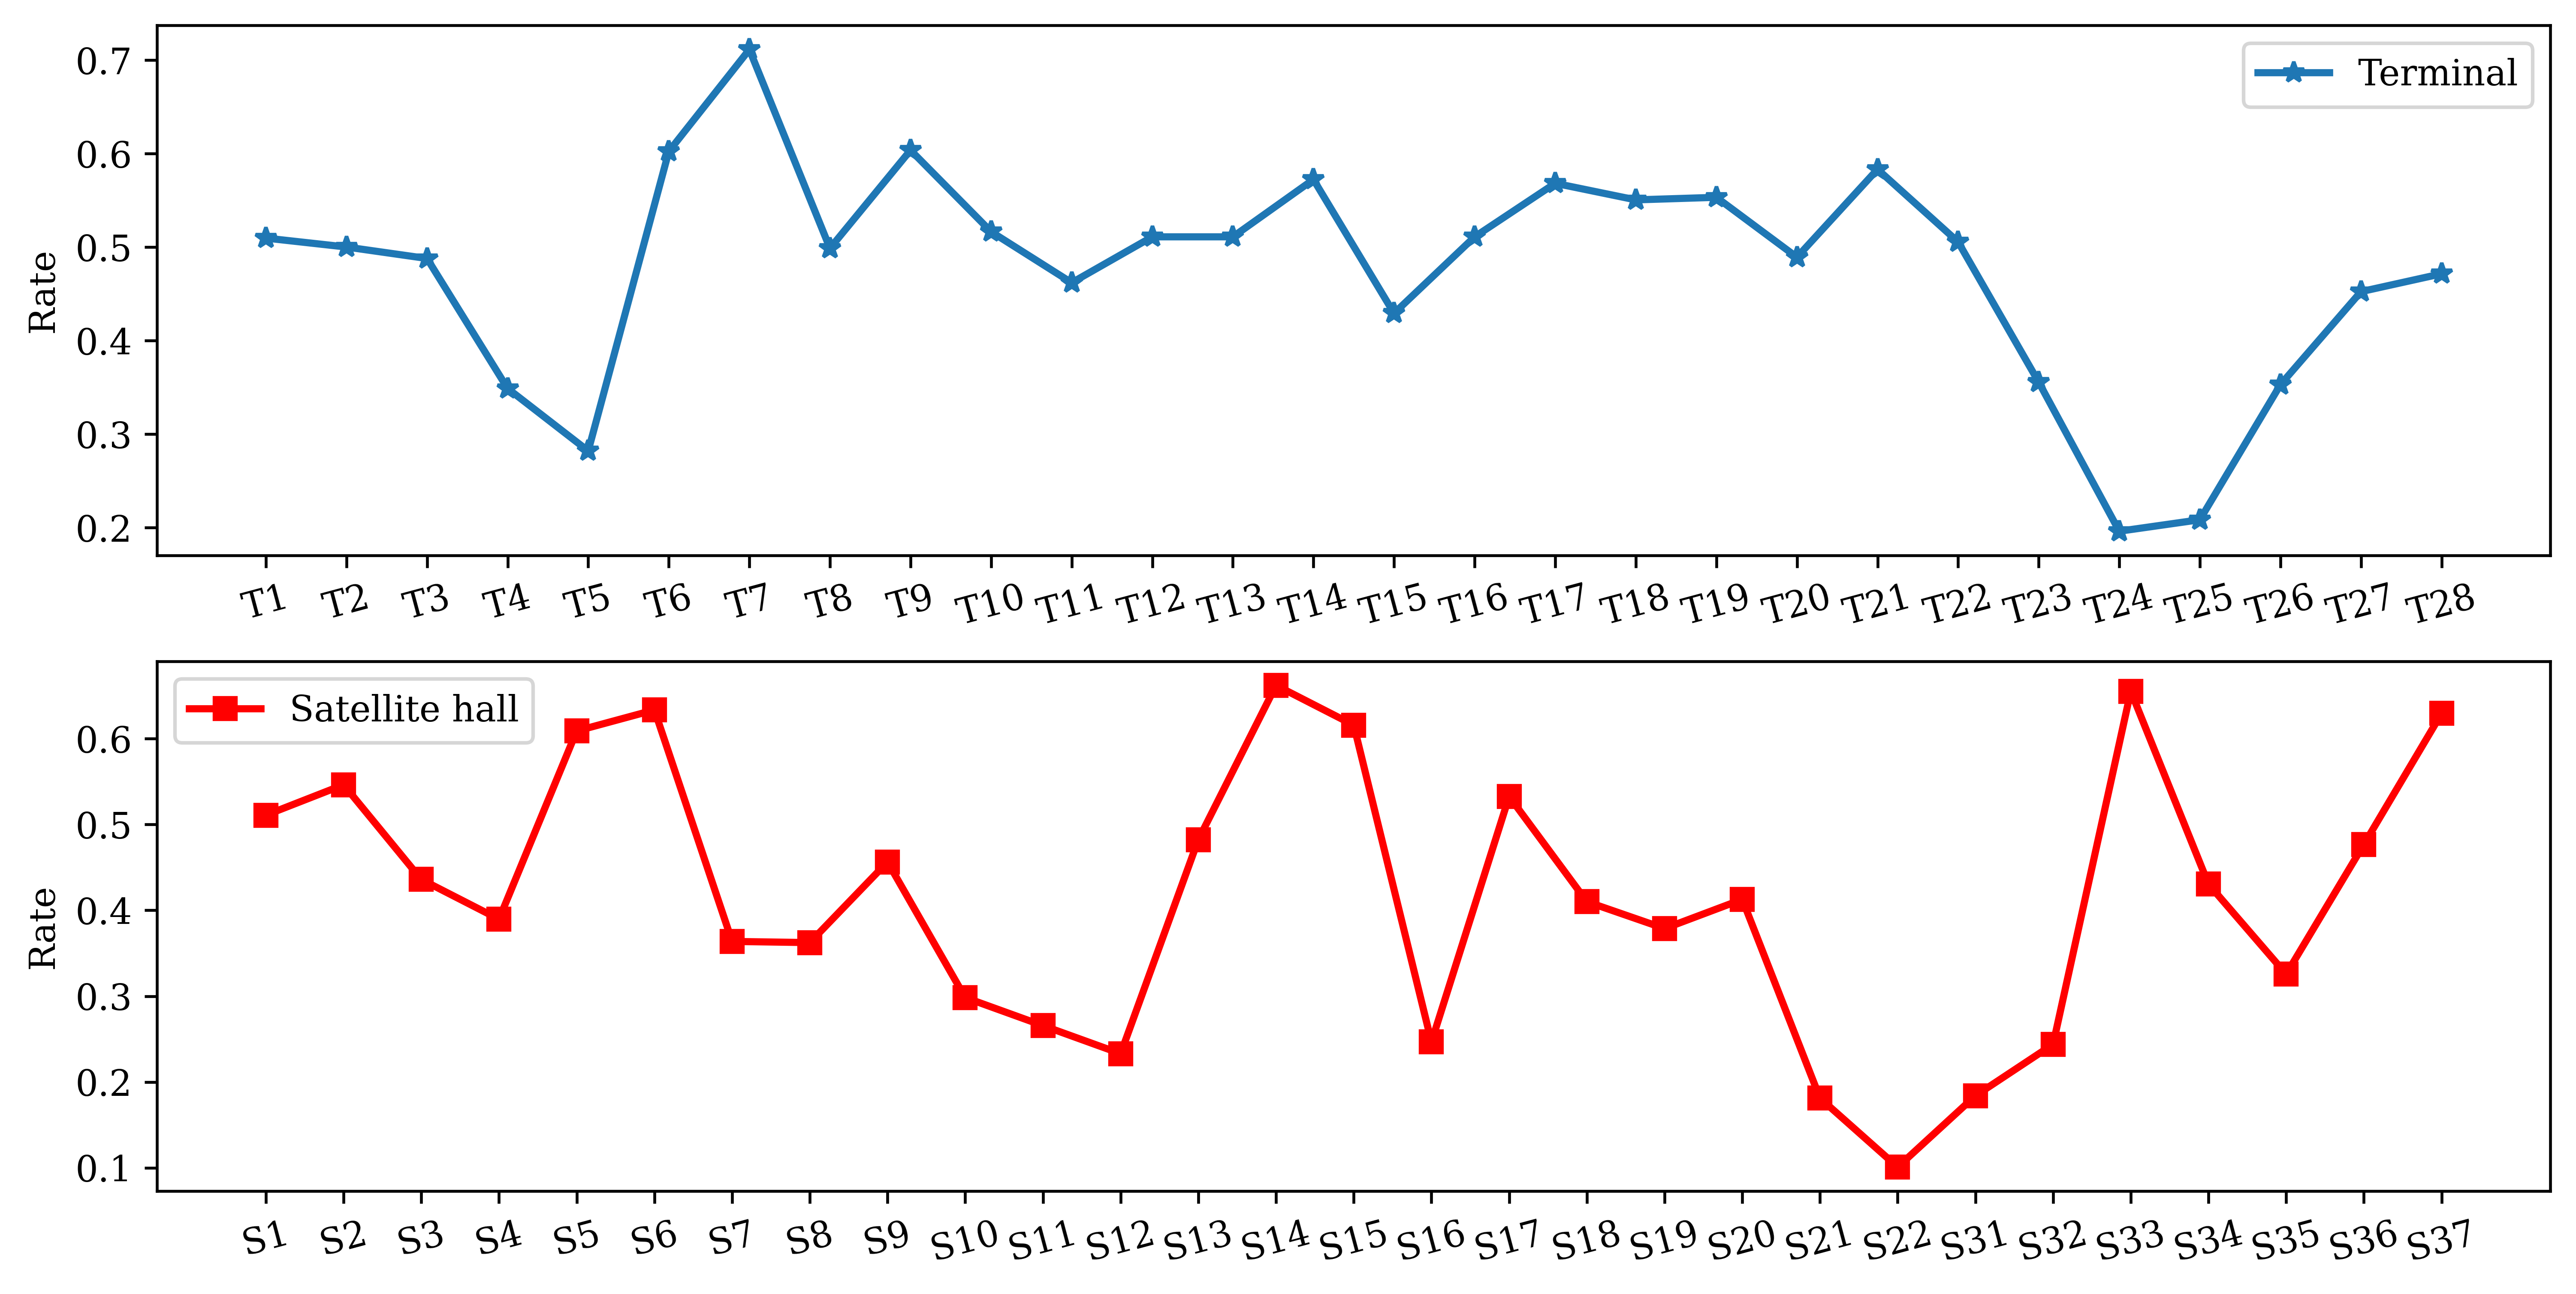

In [325]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(12,6),dpi=600)
ax1=plt.subplot(211)
plt.plot(ID_list_T,rate_gate_T,marker='*',label='Terminal',lw=2)
plt.xticks(rotation=15)
plt.ylabel('Rate')
plt.legend()
ax2=plt.subplot(212)
plt.plot(ID_list_S,rate_gate_S,marker='s',label='Satellite hall',lw=2,c='r')
plt.xticks(rotation=15)
plt.ylabel('Rate')
plt.legend()
plt.savefig('1.jpg')

In [326]:
N_list=[]
W_list=[]
for puck in max_puck:
    if puck['flag']==True:
        if df1_1[df1_1['飞机转场记录号']==puck['ID']]['飞机型号'].values[0] =='N':
            N_list.append(puck)
        else:
            W_list.append(puck)

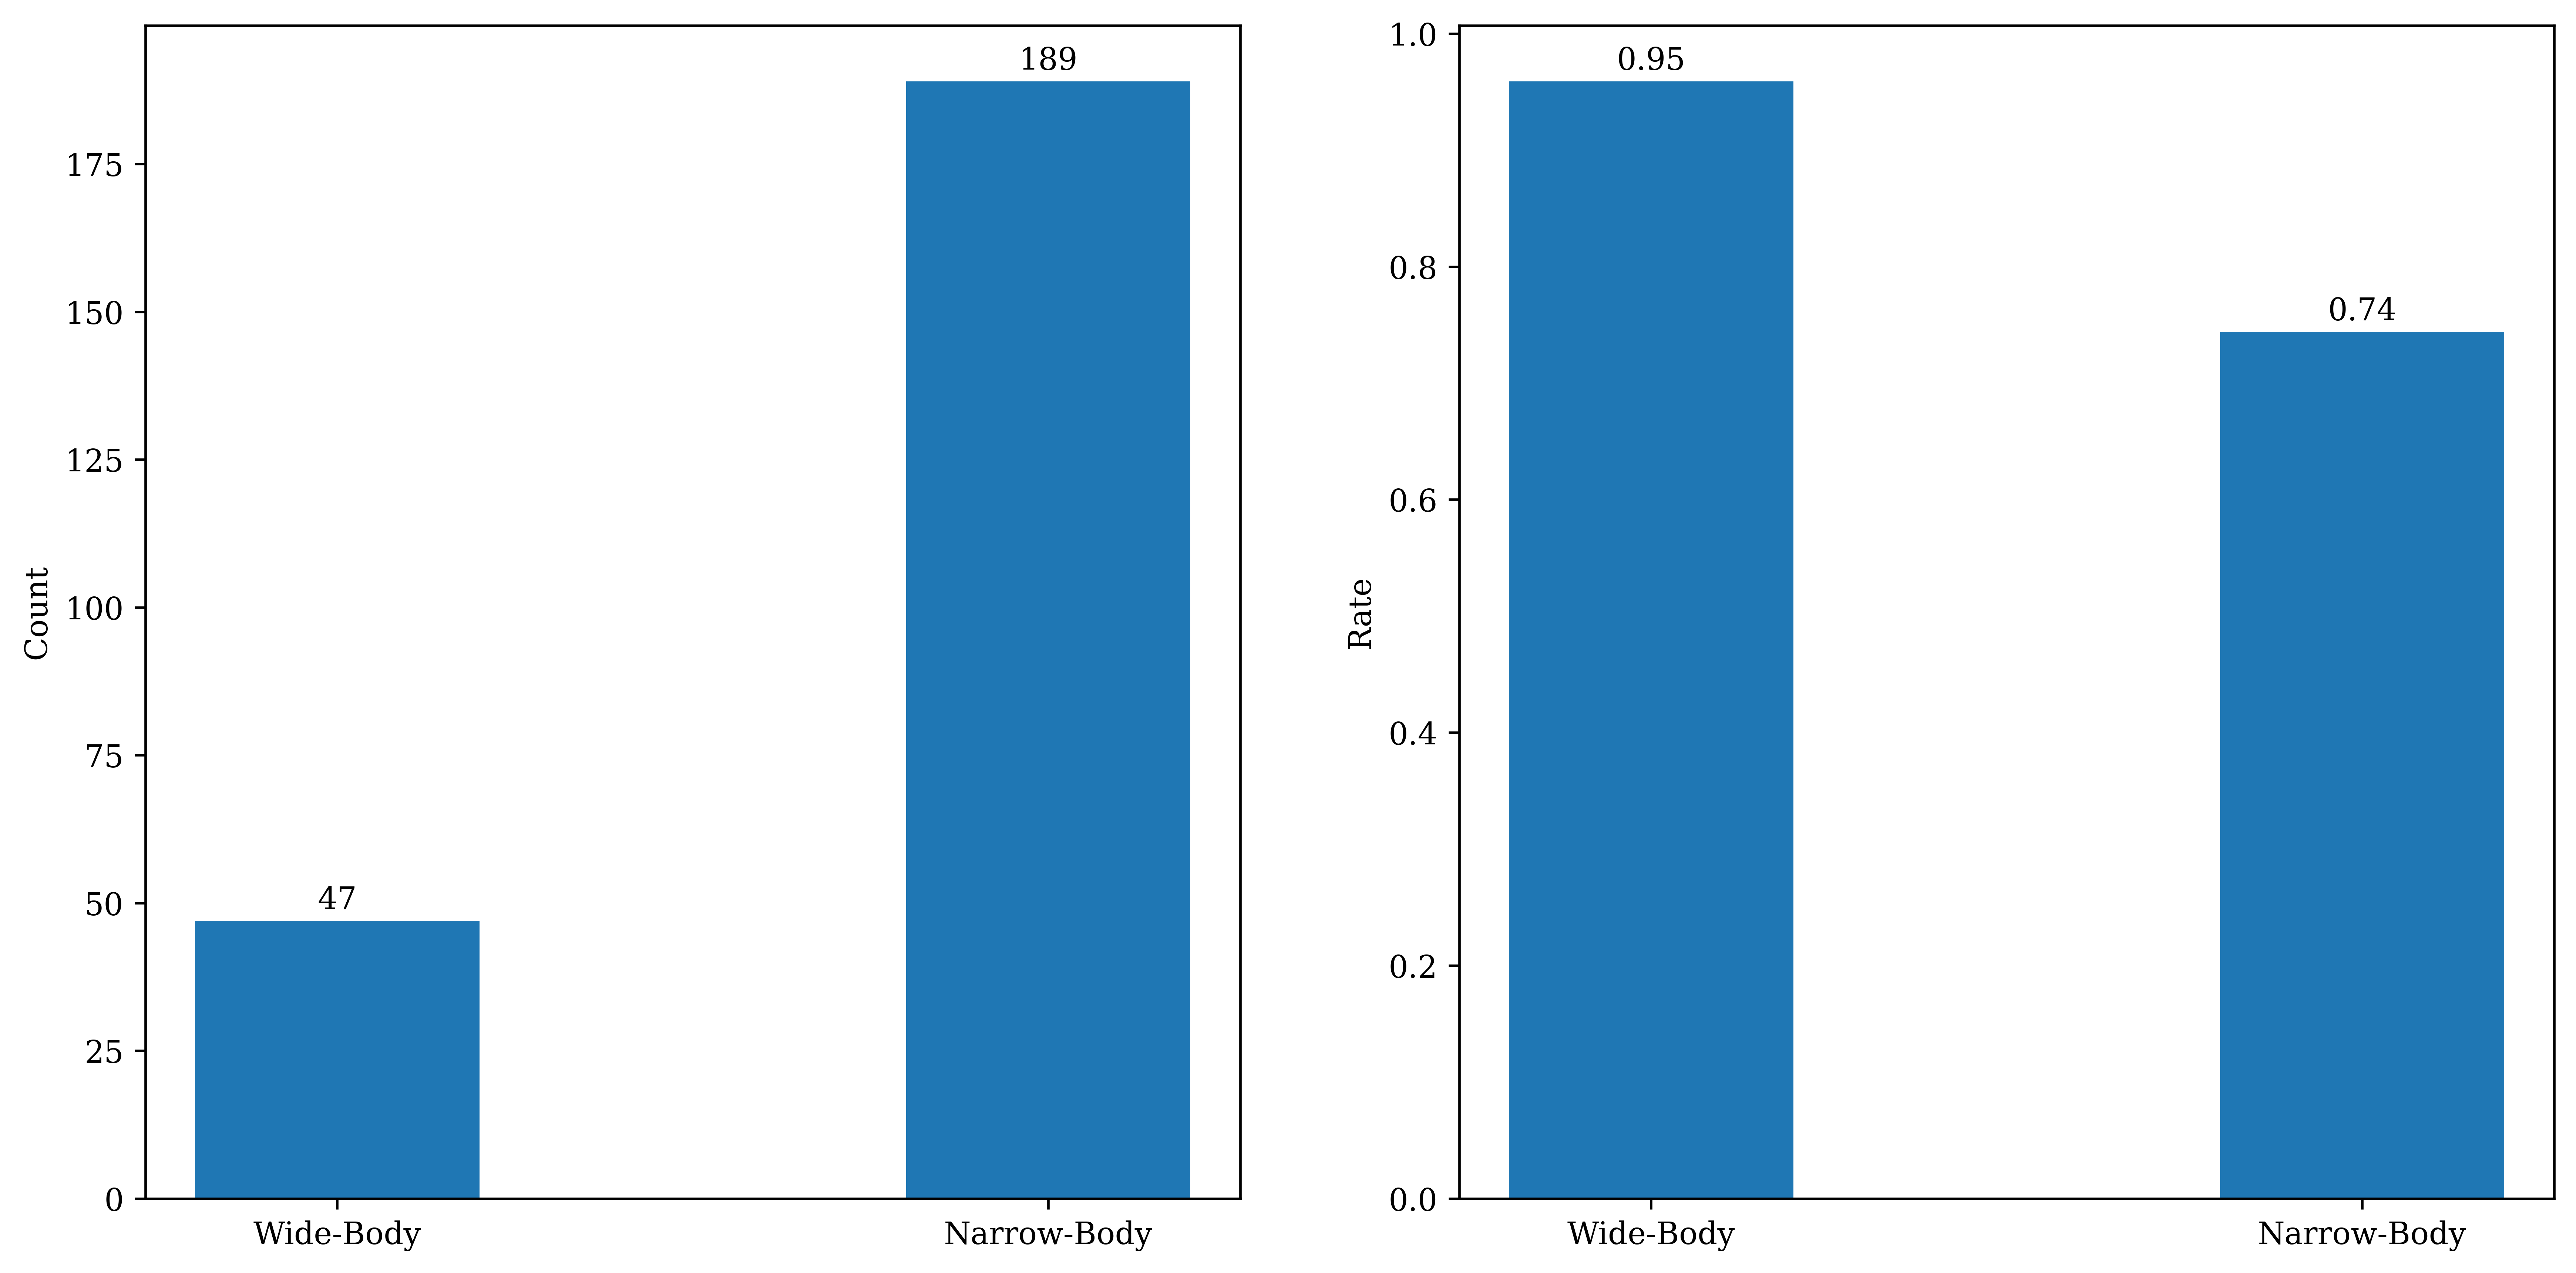

In [327]:
plt.figure(figsize=(14,7),dpi=600)
ax1=plt.subplot(121)
rects=plt.bar(['Wide-Body','Narrow-Body'],[len(W_list),len(N_list)],width=0.4)
plt.ylabel('Count')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,height+2,str(height),ha='center')

ax2=plt.subplot(122)
rects=plt.bar(['Wide-Body','Narrow-Body'],[len(W_list)/len(df1_1[df1_1['飞机型号']=='W']),len(N_list)/len(df1_1[df1_1['飞机型号']=='N'])],width=0.4)
plt.ylabel('Rate')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,height+0.01,str(height)[:4],ha='center')
plt.savefig('2.jpg')

In [328]:
max_puck[0]['index']

136

In [329]:
puck_list_1=[]
gate_list_1=[]
for gate in max_gate:
    puck_list_1.append([df1_1.iloc[i]['飞机转场记录号'] for i in gate['pucks_list']])
    gate_list_1.append(gate['ID'])

In [330]:
result_1=pd.DataFrame({'Gate':gate_list_1,'Pucks':puck_list_1})
result_1.to_excel('result_1.xlsx')

In [331]:
df2=pd.read_excel('InputData.xlsx',sheet_name='Tickets')
df2=df2[(df2['到达\n日期']=='2018-01-20') | (df2['出发\n日期']=='2018-01-20')]
df2.head(5)

,旅客\n记录号,乘客数,到达\n航班,到达\n日期,出发\n航班,出发\n日期
1316,T1317,2,GN0641,2018-01-19,NV664,2018-01-20
1355,T1356,2,NV673,2018-01-19,NV664,2018-01-20
1356,T1357,2,NV673,2018-01-19,NV664,2018-01-20
1357,T1358,2,NV673,2018-01-19,NV664,2018-01-20
1358,T1359,2,NV673,2018-01-19,NV664,2018-01-20


In [332]:
str(df2['到达\n日期'][1360])[:10]

'2018-01-19'

In [333]:
def generation_tickets(puck_list,df1_1=df1_1,df2=df2):
    tickets=[]
    for i in df2.index:

        #确定进场航班的index
        df2_1=df1_1[(df1_1['到达\n航班']==df2.loc[i]['到达\n航班'])&(df1_1['到达\n日期']==str(df2.loc[i]['到达\n日期'])[:10])]
        if len(df2_1.index)>0:
            index1=df2_1.index[0]
            DI_a=puck_list[index1]['DI_a']
        else:
            index1=-99
            DI_a=None
        #确定出场航班的index
        df2_2=df1_1[(df1_1['出发\n航班']==df2.loc[i]['出发\n航班'])&(df1_1['出发\n日期']==str(df2.loc[i]['出发\n日期'])[:10])]
        if len(df2_2.index)>0:
            index2=df2_2.index[0]
            DI_l=puck_list[index1]['DI_l']
        else:
            index2=-99
            DI_l=None
        #下面是该乘客的登机口的信息
        if(len(df2_1.index)>0 and len(df2_2.index)>0):
            time_connected=int(df2_2['出发\n时刻'].values-df2_1['到达\n时刻'].values)
            if(puck_list[df2_1.index[0]]['flag'] and puck_list[df2_2.index[0]]['flag']):
                Area1=puck_list[df2_1.index[0]]['Area']
                Area2=puck_list[df2_2.index[0]]['Area']
                Zhongduanting1=puck_list[df2_1.index[0]]['Zhongduanting']
                Zhongduanting2=puck_list[df2_2.index[0]]['Zhongduanting']
                flag=True
            else:
                #乘客所乘坐的航班未被分配到登机口的情况
                flag=False
                Area1=None
                Area2=None
                Zhongduanting1=None
                Zhongduanting2=None

        else:
            time_connected=24*60
            #乘客所乘坐的航班不在20号出发或者20号到达
            flag=False
            Area1=None
            Area2=None
            Zhongduanting1=None
            Zhongduanting2=None
        dict={'ID':df2.loc[i]['旅客\n记录号'],'count':df2.loc[i]['乘客数'],'index_a':index1,'index_l':index2,\
              'puck_a':df2.loc[i]['到达\n航班'],'puck_l':df2.loc[i]['出发\n航班'],'time_a':str(df2.loc[i]['到达\n日期'])[:10],\
              'time_l':str(df2.loc[i]['出发\n日期'])[:10],'time_connected':time_connected,\
              'Area1':Area1,'Area2':Area2,'Zhongduanting1':Zhongduanting1,'Zhongduanting2':Zhongduanting2,\
              'flag':flag,'DI_a':DI_a,'DI_l':DI_l}
        tickets.append(dict)
    return tickets

In [334]:
'''
下面是定义一个函数用于判定分配方案中乘客紧张度的情况
'''
[puck_list,gate_list]=generation_plan()
tickets=generation_tickets(puck_list)

In [335]:
def short_time(Zhongduanting1,Zhongduanting2,DI_a,DI_l):
    df=pd.DataFrame({'D-T':[15,20,25,40],\
                     'D-S':[20,15,40,45],\
                     'I-T':[35,40,20,30],\
                     'I-S':[40,35,30,20],\
                     },index=['D-T','D-S','I-T','I-S'])
    index1=str(DI_a)+'-'+str(Zhongduanting1)
    index2=str(DI_l)+'-'+str(Zhongduanting2)
    return df.loc[index1][index2]
print(short_time('S','T','D','I'))
def compute_shortcut(Zhongduanting1,Zhongduanting2,DI_a,DI_l):
    count=0
    if(DI_a==DI_l):
        if(Zhongduanting1==Zhongduanting2):
            count=0
        else:
            count=1
    else:
        if(Zhongduanting1!=Zhongduanting2):
            count=1
        else:
            if(Zhongduanting1=='S' and Zhongduanting2=='S'):
                if(DI_a=='D' and DI_l=='I'):
                   count=0
                elif(DI_a=='I' and DI_l=='D'):
                    count=2
            elif(Zhongduanting1=='T' and Zhongduanting2=='T'):
                count=0
    return count*8

compute_shortcut('S','S','I','D')

40


16

In [336]:
def compute_walk_time(Zhongduanting1,Zhongduanting2,Area1,Area2):

    df_walktime=pd.DataFrame({'T-North':[10,15,20,25,20,25,25],\
                  'T-Center':[15,10,15,20,15,20,20],\
                  'T-South':[20,15,10,25,20,25,25],\
                  'S-North':[25,20,25,10,15,20,20],\
                  'S-Center':[20,15,20,15,10,15,15],\
                  'S-South':[25,20,25,20,15,10,20],\
                  'S-East':[25,20,25,20,15,20,10],\
                  },index=['T-North','T-Center','T-South','S-North','S-Center','S-South','S-East'])
    index1=Zhongduanting1+'-'+Area1
    index2=Zhongduanting2+'-'+Area2
    return df_walktime.loc[index1][index2]
compute_walk_time('T','T','North','South')

20

In [337]:
'''
这里有两种特殊的情况：
一种是未分配到登机口 不计算紧张度
一种是紧张度较小的旅客 计入比较小的紧张度
'''
def compute_tension(tickets):
    count=0
    all_tension=0
    for ticket in tickets:
        if(ticket['flag']==True):
            each_tension=(compute_walk_time(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['Area1'],ticket['Area2'])+\
                compute_shortcut(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['DI_a'],ticket['DI_l'])\
                          +short_time(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['DI_a'],ticket['DI_l']))/ticket['time_connected']
            each_tension=each_tension*ticket['count']
            all_tension=all_tension+each_tension
            count=count+ticket['count']

        elif(ticket['flag']==False and ticket['time_connected']==24*60 and ticket['index_l']!=None):
            each_tension=(40+36)/1440

            all_tension=all_tension+each_tension
            count=count+ticket['count']
    ave_tension=all_tension/count
    return ave_tension

In [338]:
min=0.5
from tqdm import tqdm
pbar=tqdm(range(1000))
trace=[]
for i in pbar:
    [puck_list,gate_list]=generation_plan()
    tickets=generation_tickets(puck_list)

    value=compute_tension(tickets)
    if(value<min):
        min=value
        min_puck=puck_list
        min_gate=gate_list
        min_ticket=tickets
    trace.append(min)
    pbar.set_description('Value:%s'%value)

Value:0.23296306840616252: 100%|██████████| 1000/1000 [1:32:24<00:00,  5.54s/it]


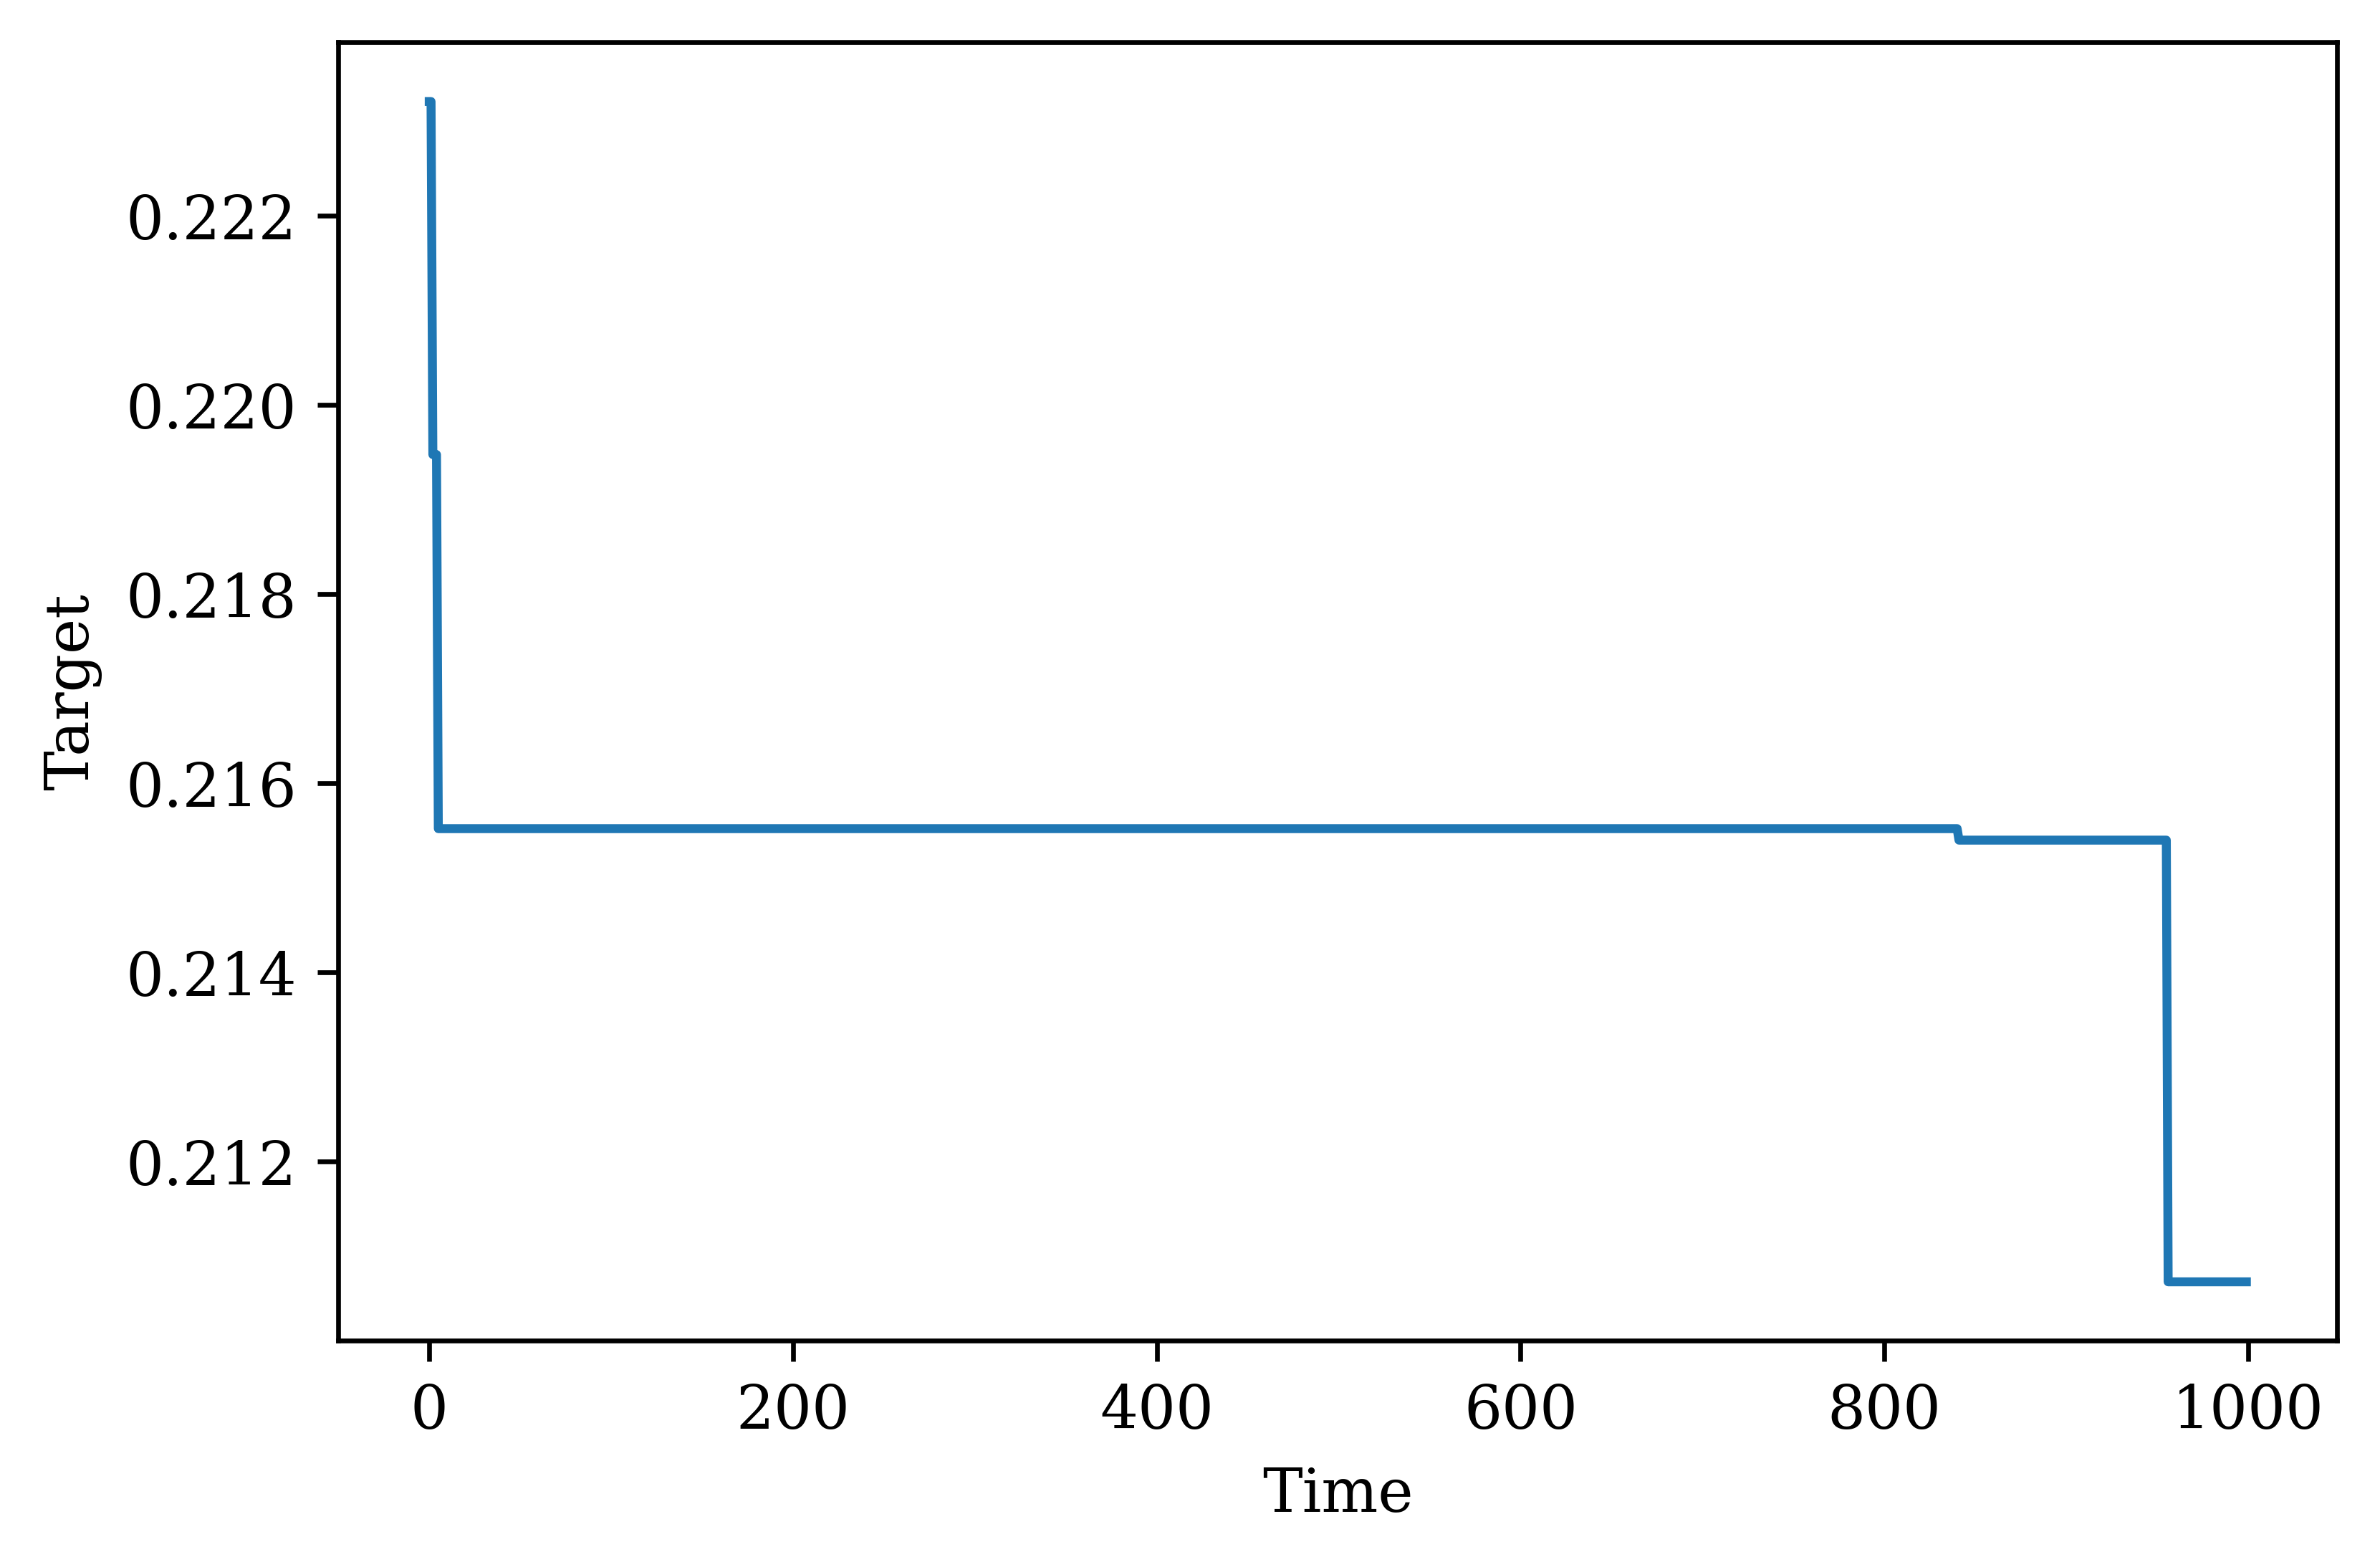

In [340]:
plt.figure(dpi=(600))
plt.plot(range(len(trace)),trace)
plt.ylabel('Target')
plt.xlabel('Time')
plt.savefig('trace.jpg')

In [342]:
print(min)
puck_list_1=[]
gate_list_1=[]
for gate in min_gate:
    puck_list_1.append([df1_1.iloc[i]['飞机转场记录号'] for i in gate['pucks_list']])
    gate_list_1.append(gate['ID'])

0.21073152891499444


In [343]:
result_3=pd.DataFrame({'Gate':gate_list_1,'Pucks':puck_list_1})
result_3.to_html('3.html')
result_3.to_excel('3.xlsx')

In [344]:
def plot_gate_rate(max_gate,jpg_name):
    rate_gate_T=[]
    ID_list_T=[]
    rate_gate_S=[]
    ID_list_S=[]
    for gate in max_gate:
        if(len(gate['pucks_list']) >0):
            if(gate['ID'][0]=='T'):
             rate_gate_T.append(gate['time_plan'].count(0)/734)
             ID_list_T.append(gate['ID'])
            elif(gate['ID'][0]=='S'):
                rate_gate_S.append(gate['time_plan'].count(0)/734)
                ID_list_S.append(gate['ID'])
    import matplotlib.pyplot as plt
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize=(12,6),dpi=600)
    ax1=plt.subplot(211)
    plt.plot(ID_list_T,rate_gate_T,marker='*',label='Terminal',lw=2)
    plt.xticks(rotation=15)
    plt.ylabel('Rate')
    plt.legend()
    ax2=plt.subplot(212)
    plt.plot(ID_list_S,rate_gate_S,marker='s',label='Satellite hall',lw=2,c='r')
    plt.xticks(rotation=15)
    plt.ylabel('Rate')
    plt.legend()
    plt.savefig(str(jpg_name)+'.jpg')

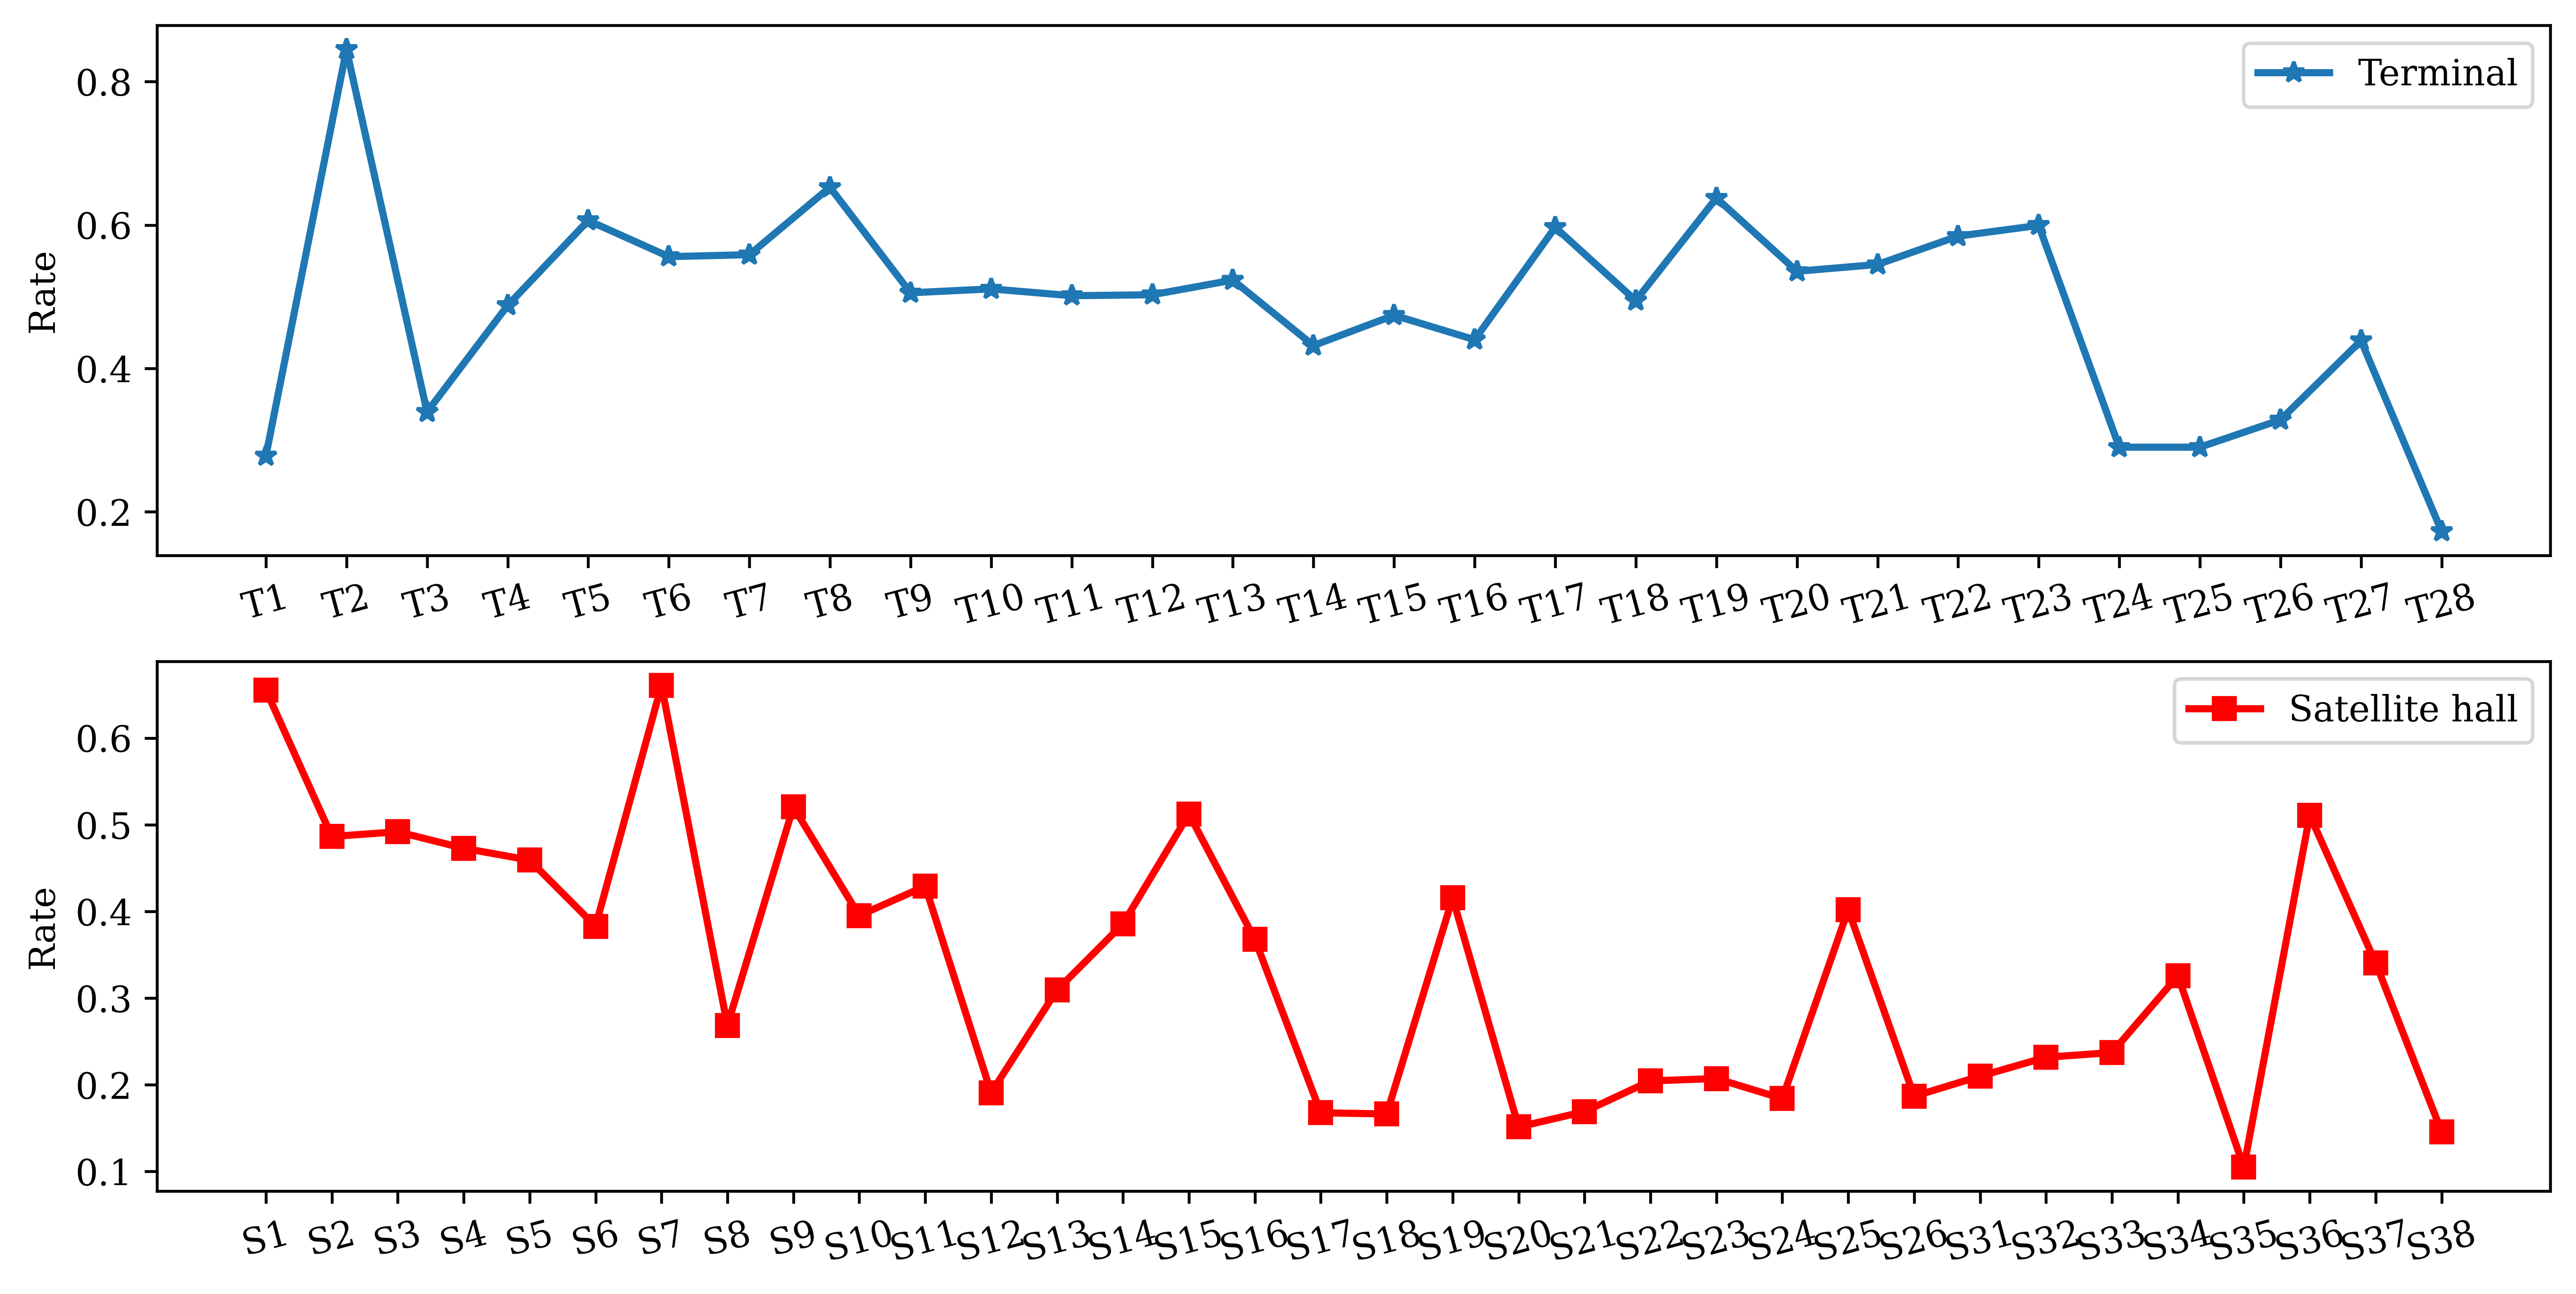

In [345]:
plot_gate_rate(min_gate,'3_1')

In [353]:
def compute_changetime(tickets):
    count=0
    all_time=0
    count_0=0

    count_10=0
    count_15=0
    count_20=0
    count_25=0
    count_30=0
    count_35=0
    count_40=0
    count_45=0
    count_50=0
    count_55=0
    count_99=0
    for ticket in tickets:
        if(ticket['flag']==True):
            each_time=(compute_walk_time(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['Area1'],ticket['Area2'])+\
                compute_shortcut(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['DI_a'],ticket['DI_l']))

            count=count+ticket['count']
            if(each_time<ticket['time_connected']):
                if each_time<=10:
                    count_10+=ticket['count']
                elif 10<each_time<=15:
                    count_15+=ticket['count']
                elif 15<each_time<=20:
                    count_20+=ticket['count']
                elif 20<each_time<=25:
                    count_25+=ticket['count']
                elif 25<each_time<=30:
                    count_30+=ticket['count']
                elif 30<each_time<=35:
                    count_35+=ticket['count']
                elif 35<each_time<=40:
                    count_40+=ticket['count']
                elif 40<each_time<=45:
                    count_45+=ticket['count']
                elif 45<each_time<=50:
                    count_50+=ticket['count']
                elif 50<each_time<=55:
                    count_55+=ticket['count']
                else:
                    count_99+=ticket['count']
            else:
                count_0+=ticket['count']
            each_time=each_time*ticket['count']
            all_time=all_time+each_time
        # elif(ticket['flag']==False and ticket['time_connected']!=24*60):
        #         count_0+=ticket['count']

    ave_time=all_time/count
    list1=[count_10,count_15,count_20,count_25,count_30,count_35,count_40,count_45,count_50,count_55,count_99]
    all=sum(list1)
    for i in range(len(list1)):
        list1[i]=list1[i]/all
    #平均时间、换乘失败的人数、时间列表、
    return ave_time,count_0,list1

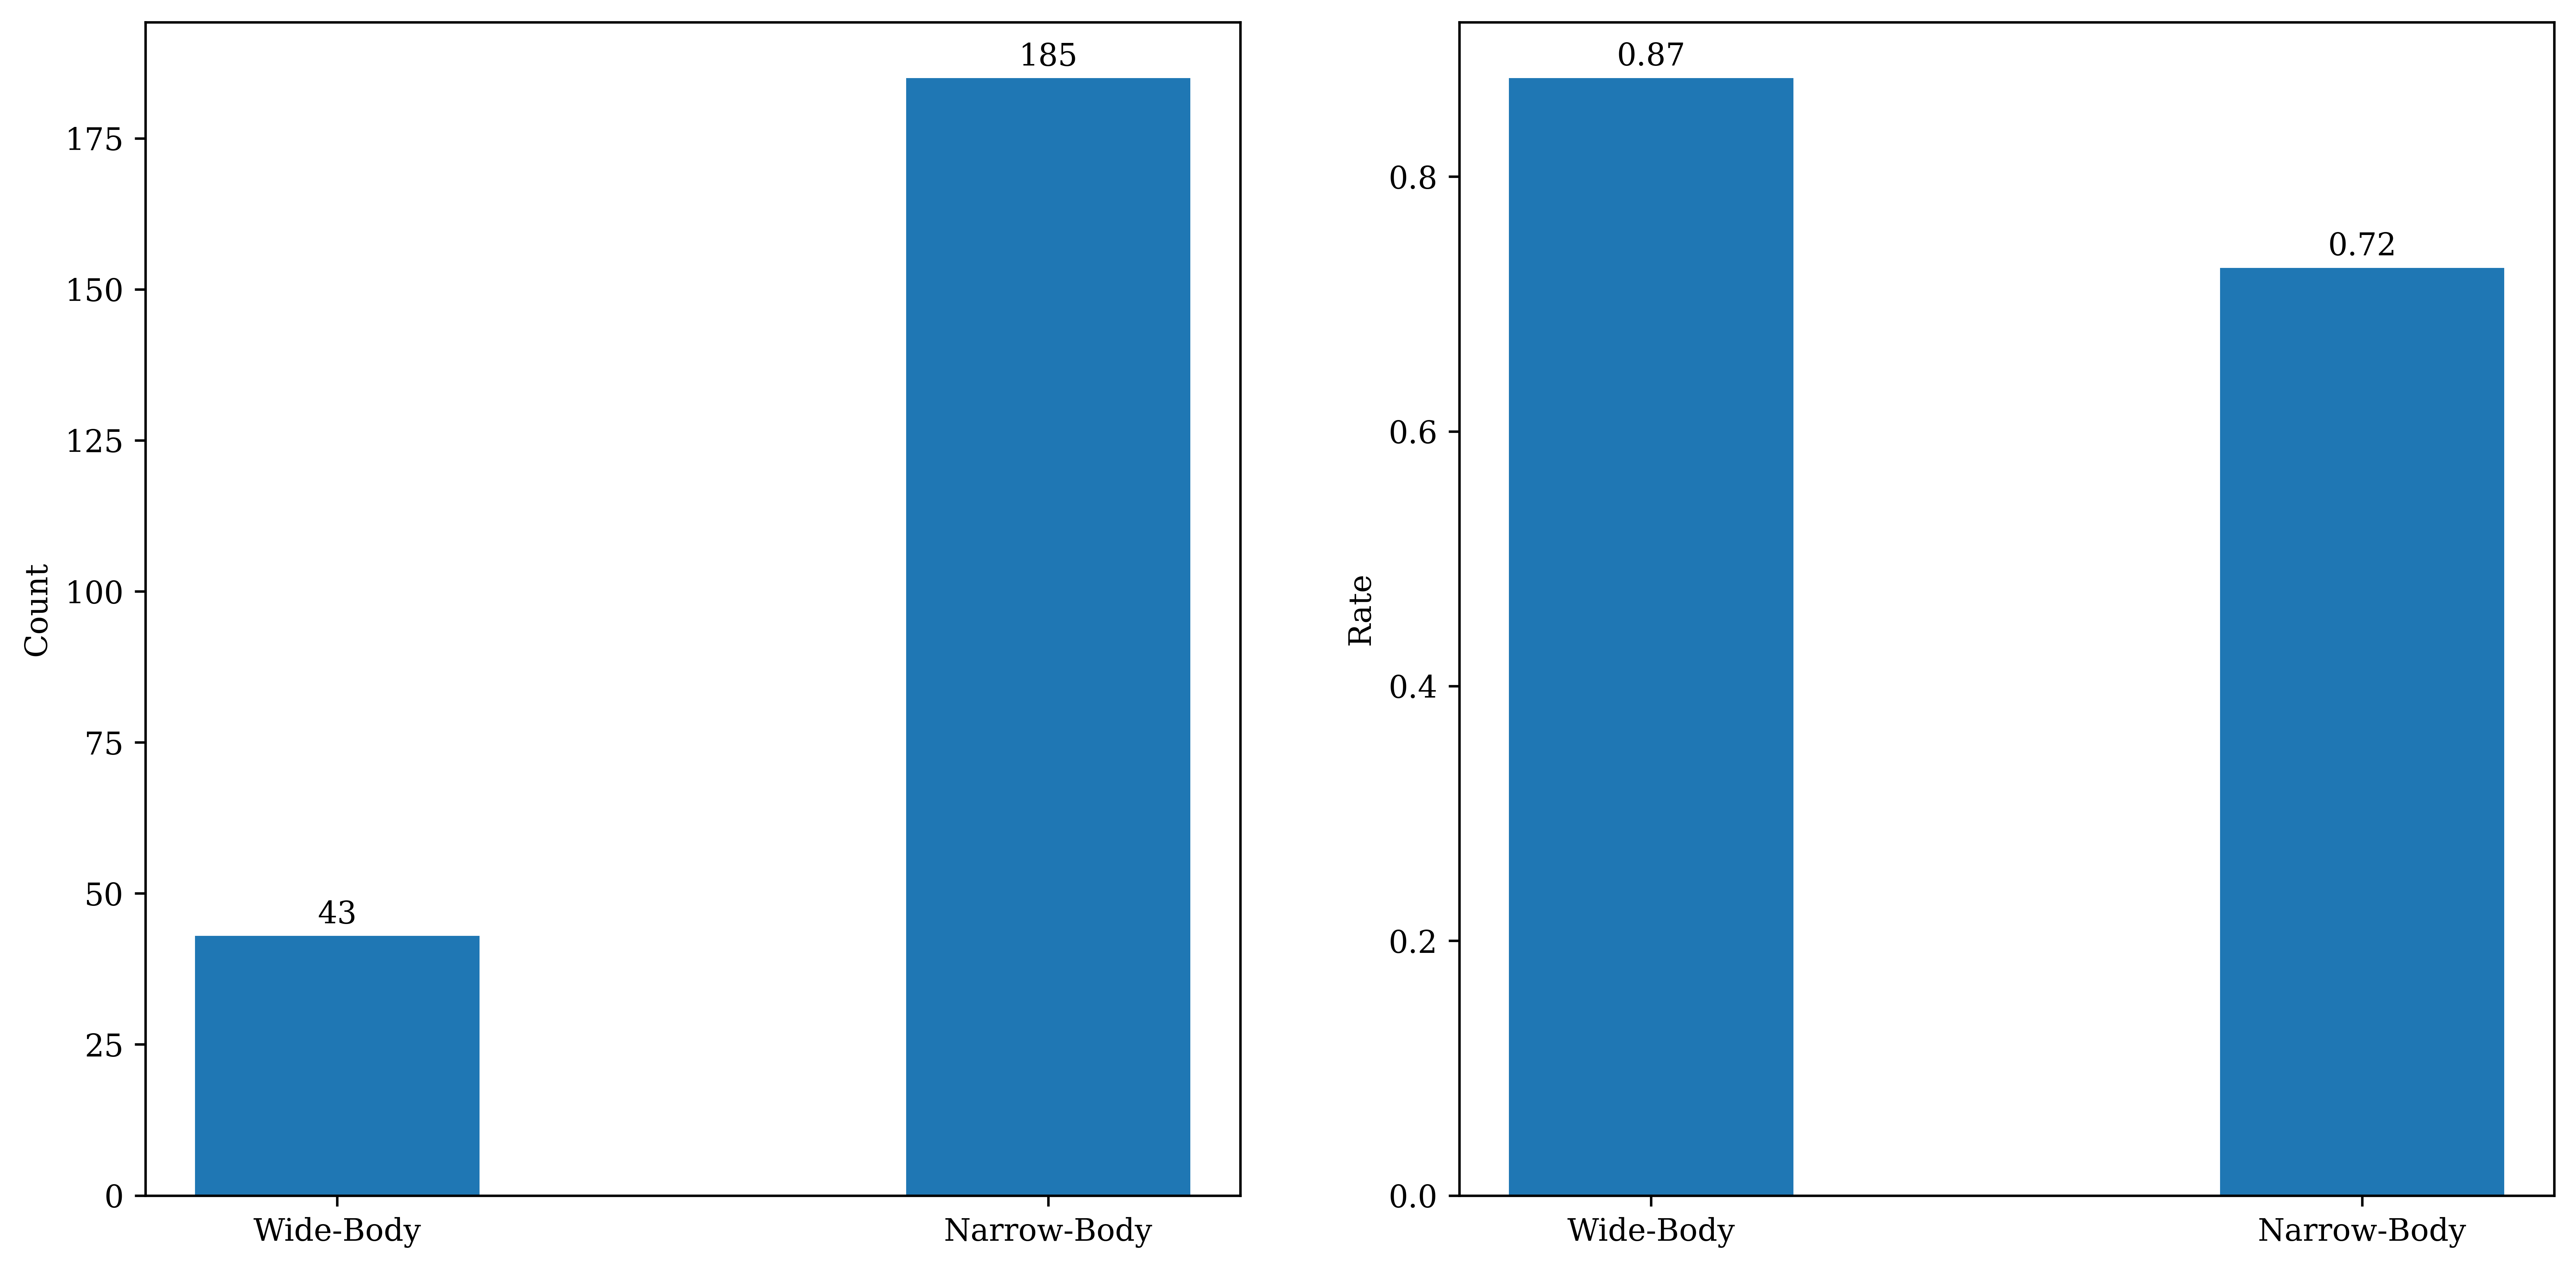

In [347]:
def plot_N_W(min_puck,jpg_name):
    N_list=[]
    W_list=[]
    for puck in min_puck:
        if puck['flag']==True:
            if df1_1[df1_1['飞机转场记录号']==puck['ID']]['飞机型号'].values[0] =='N':
                N_list.append(puck)
            else:
                W_list.append(puck)



    plt.figure(figsize=(14,7),dpi=600)
    ax1=plt.subplot(121)
    rects=plt.bar(['Wide-Body','Narrow-Body'],[len(W_list),len(N_list)],width=0.4)
    plt.ylabel('Count')
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2,height+2,str(height),ha='center')

    ax2=plt.subplot(122)
    rects=plt.bar(['Wide-Body','Narrow-Body'],[len(W_list)/len(df1_1[df1_1['飞机型号']=='W']),len(N_list)/len(df1_1[df1_1['飞机型号']=='N'])],width=0.4)
    plt.ylabel('Rate')
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2,height+0.01,str(height)[:4],ha='center')
    plt.savefig(str(jpg_name)+'.jpg')
plot_N_W(min_puck,'result_3')

In [354]:
ave_time,count_0,list1=compute_changetime(tickets)
ave_time

20.541975308641977

In [355]:
count_0

0

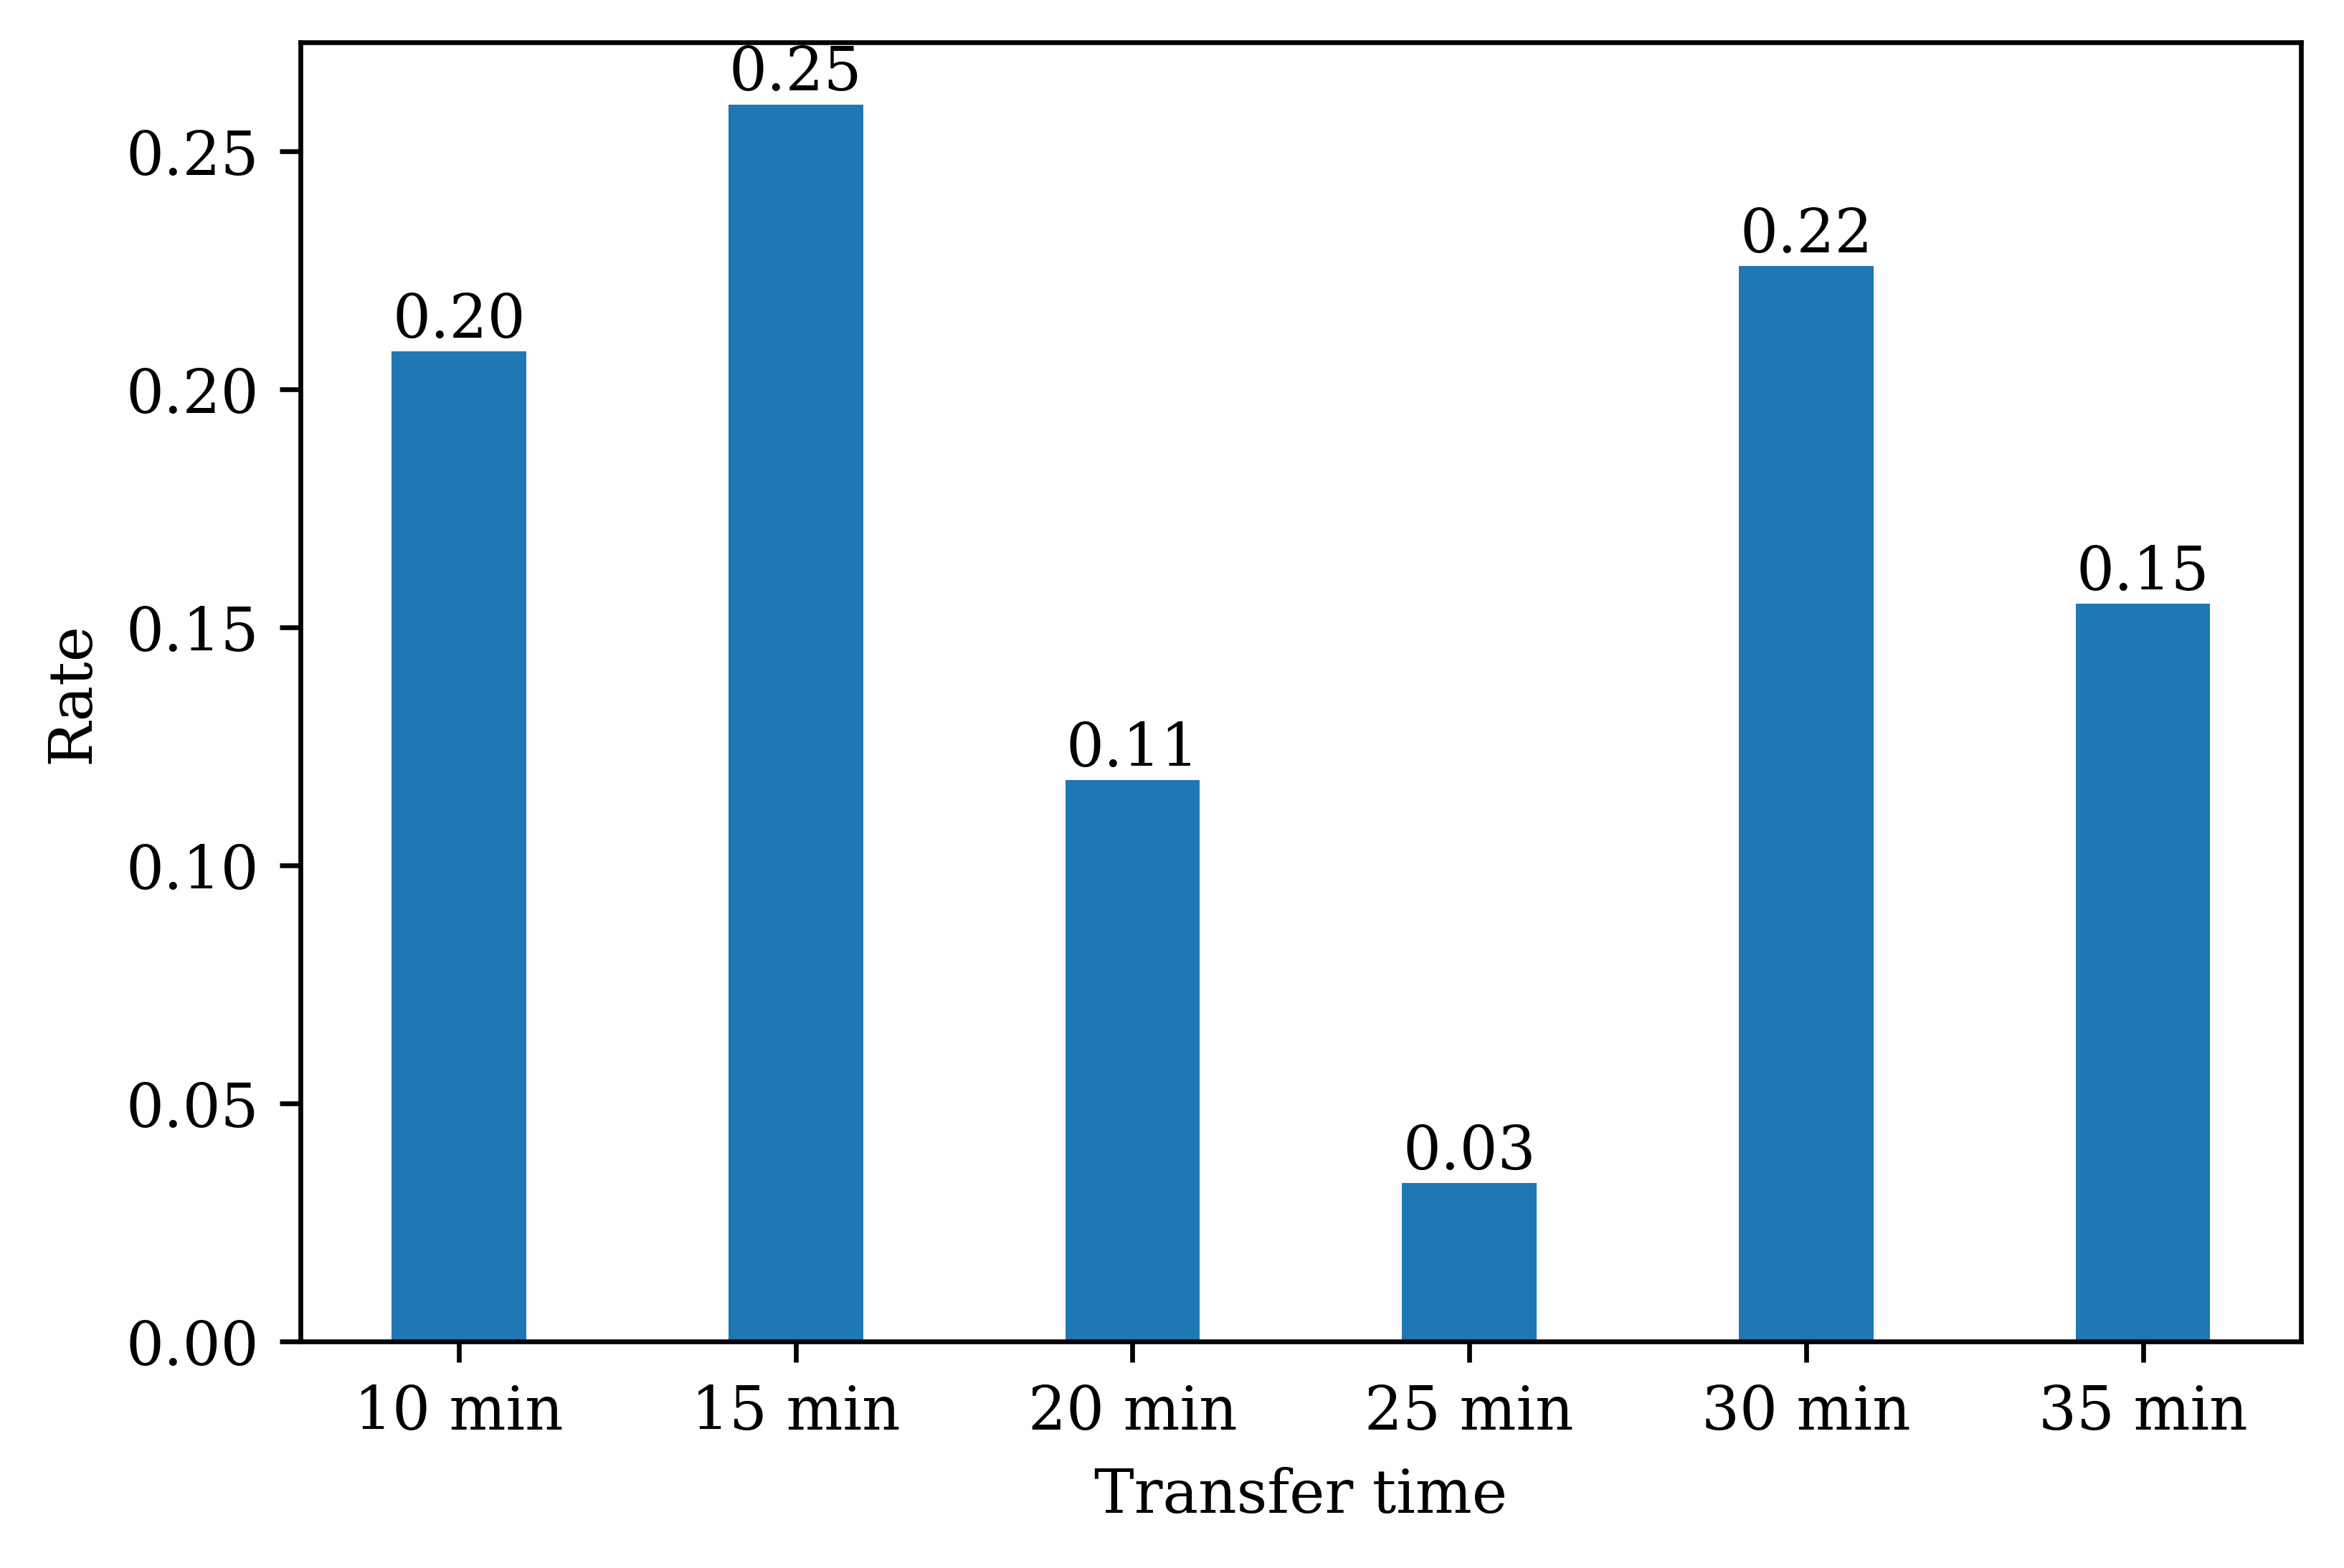

In [349]:
plt.figure(dpi=600)
rects=plt.bar(['10 min','15 min','20 min','25 min','30 min','35 min'],list1[:6],width=0.4)
plt.ylabel('Rate')
plt.xlabel('Transfer time')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,height+0.003,str(height)[:4],ha='center')
plt.savefig('乘客换乘时间.jpg')

In [350]:
def compute_each_tension(tickets):
    count=0
    all_tension=0
    list1=[0,0,0,0,0,0,0,0,0]
    for ticket in tickets:
        if(ticket['flag']==True):
            each_tension=(compute_walk_time(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['Area1'],ticket['Area2'])+\
                compute_shortcut(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['DI_a'],ticket['DI_l'])+\
                          short_time(ticket['Zhongduanting1'],ticket['Zhongduanting2'],ticket['DI_a'],ticket['DI_l']))/ticket['time_connected']
            list1[int(each_tension*10)]=+ticket['count']
            each_tension=each_tension*ticket['count']
            all_tension=all_tension+each_tension
            count=count+ticket['count']

        elif(ticket['flag']==False and ticket['time_connected']==24*60 and ticket['index_l']!=None):
            each_tension=36/1440

            all_tension=all_tension+each_tension
            count=count+ticket['count']
    all=sum(list1)
    for i in range(len(list1)):
        list1[i]=list1[i]/all
    ave_tension=all_tension/count
    return ave_tension,list1
ave_tension,list_tension=compute_each_tension(min_ticket)
ave_tension

0.20880633639574264

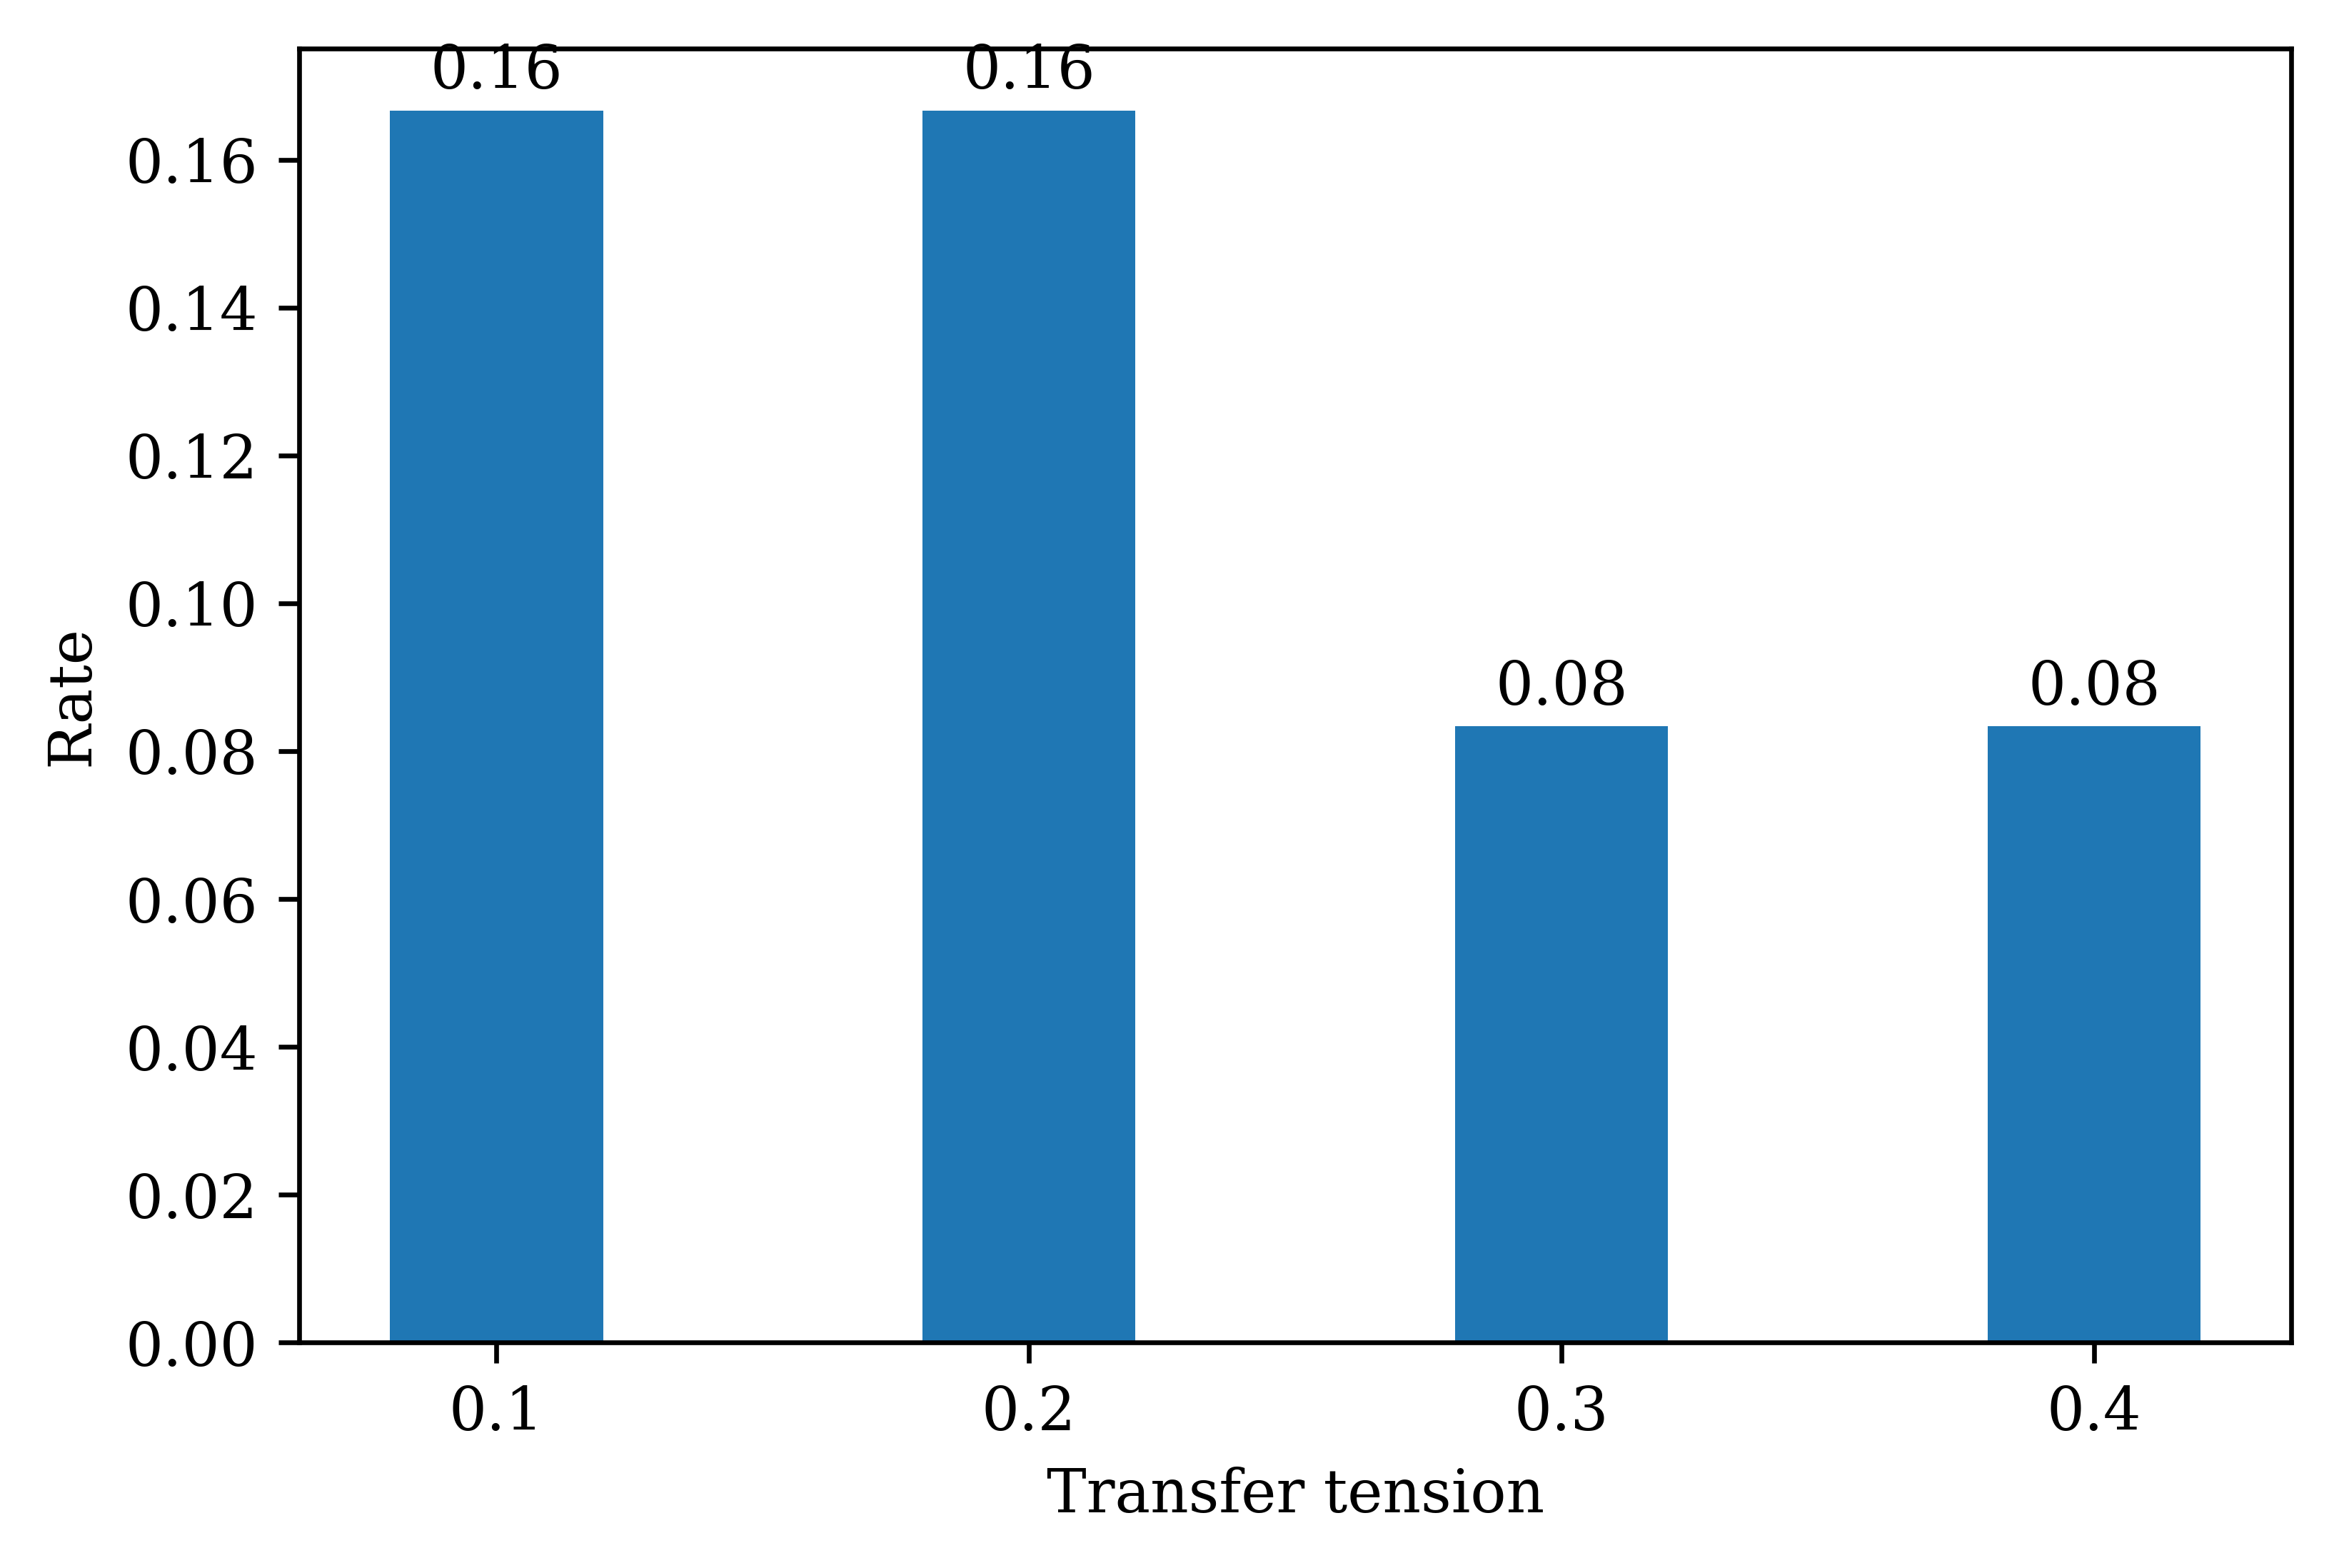

In [351]:
plt.figure(dpi=600)
rects=plt.bar(['0.1','0.2','0.3','0.4'],list_tension[:4],width=0.4)
plt.ylabel('Rate')
plt.xlabel('Transfer tension')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,height+0.003,str(height)[:4],ha='center')
plt.savefig('乘客换乘紧张度.jpg')